In [16]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

import utils
from model import BadModel
from dataset import SwingDataset, augment
from sklearn.metrics import confusion_matrix
import seaborn as sn

from skl_dataset import SKLSwingDataset, augment

#import torch
#from torch import nn
#from tqdm import tqdm, trange

In [17]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

path = "data/"

shot_types = ["Pull-hook", "Hook", "Pull", "Fade", "Straight", "Draw", "Push", "Slice" , "Push-slice"]


In [19]:
X_data, y_data = utils.load_data(path)

In [20]:
n = X_data.shape[0]

# GENERATE DATA SPLITS
train = 0.75
val = 0.2
test = 0.05

X_train = X_data[:int(n*train),:,:] 
y_train = y_data[:int(n*train),:]

X_val = X_data[int(n*train):int(n*(val+train)),:,:]
y_val = y_data[int(n*train):int(n*(val+train)),:]

X_test = X_data[-int(n*test):,:,:]
y_test = y_data[-int(n*test):,:]

# /GENERATE DATA SPLITS

In [21]:
train_set = SKLSwingDataset(X_train, y_train, augment=True)
val_set = SKLSwingDataset(X_val, y_val, mean=train_set.mean, std=train_set.std, y_mean=train_set.y_dist_mean, y_std=train_set.y_dist_std)
test_set = SKLSwingDataset(X_test, y_test, mean=train_set.mean, std=train_set.std, y_mean=train_set.y_dist_mean, y_std=train_set.y_dist_std)


In [22]:
np.save("norm_data/X_mean.npy", train_set.mean)
np.save("norm_data/X_std.npy", train_set.std)
np.save("norm_data/y_mean.npy", train_set.y_dist_mean)
np.save("norm_data/y_std.npy", train_set.y_dist_std)

In [23]:
train_set.mean == np.load("norm_data/X_mean.npy")

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

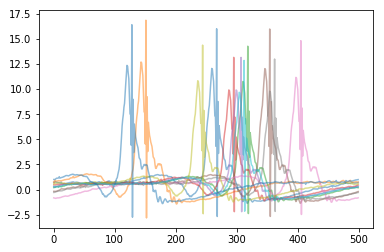

In [24]:
# test the data augmentation
plt.plot(train_set.X_data[0][0],alpha=0.5)
for _ in range(10):
    plt.plot(augment(train_set.X_data[0][0]), alpha=0.5)
plt.show()

In [26]:
#bestmodel_file = os.path.join("weights", "best_model.pth")

#model = BadModel(5, 1, 3).to(device)
# model = MSResNet(input_channel=6, num_classes=10)

#swing_type_loss = nn.BCELoss()
#distance_loss = nn.MSELoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#losses = []
#va_losses = []

#iter_idx = -1
#best_va_loss = 9999 
#val_interval = 50
#report_interval = 10
# loss_history = []

iters = -1    #-1 is unlimited. Will need to determine how many are needed to converge.

In [1]:
X_train = train_set.X_data
y_train = train_set.y_data

#One-vs-one SVM with rbf kernel.
rbfsvm = svm.SVC(kernel='rbf', decision_function_shape='ovo',
                   gamma=1, C=1).fit(X_train, y_train)
     
    
X_test = train_set.X_data
y_test = trainset.y_data

#Calc accuracy
rbf_accuracy = rbfsvm.score(X_test, y_test)

print ("SVM accuracy is: " + rbf_accuracy)
        

NameError: name 'e' is not defined

In [31]:
#Have to update this to work with SVM
def print_preds(predictions, truth, mean, std):
    for pred, true in zip(predictions, truth):
        pred_distance = pred[-1] * std + mean
        pred_argmax = torch.argmax(pred[:-1])
        pred_shot_type = shot_types[pred_argmax]
        print(f"Pred: {pred_shot_type} {round(pred_distance.item())}yds")
        
        true_distance = true[-1] * std + mean
        true_argmax = torch.argmax(true[:-1])
        true_shot_type = shot_types[true_argmax]
        
        print(f"True: {true_shot_type} {round(true_distance.item())}yds")
        print()

In [33]:
predictions = rbfsvm.predict(X_test)

In [35]:
#print_preds(test_out, true_out, train_set.y_dist_mean, train_set.y_dist_std)

Pred: Straight 125yds
True: Fade 135yds

Pred: Push-slice 57yds
True: Push-slice 70yds

Pred: Push-slice 67yds
True: Push-slice 30yds

Pred: Push 105yds
True: Push-slice 70yds

Pred: Pull 139yds
True: Straight 115yds



In [36]:
cm = confusion_matrix(true_shot_types, test_shot_types)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

NameError: name 'confusion_matrix' is not defined